In [1]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

Hello everyone,so in last chapter we discussed about an end to end process on building an Image
Classifier Application which included data collection,data cleaning,building a model and then using
that model to clean our data.We also learnt on saving our model and how to turn it into an application
using voila.We also went through the risks associated with a deep learning project and how they can 
be avoided before deploying the model.
In this chapter,we are going to discuss about training a digit classifier using baseline model,we
will also learn about different operations on tensors and arrays in Pytorch,how to train a neural net
work from scratch and some fundamentals of Neural net.

# Under the Hood: Training a Digit Classifier

We saw previously about end to end project on deep learning.Now in this chapter we would explore more
on computer vision and its basic concepts and tools for deep learning.
We will also learn about tensors and arrays and how different operations are performed on them by 
broadcasting.We will discuss about basic terms such as gradient,loss function,updating weights,
mini-batches,optimizer etc and how we can build them using scratch and how we put them together.
In further chapters,we would learn more about specific examples.But this chapter would teach concepts
of a basic neural network which is same for every deep learning application.So this chapter will lay
foundations for every deep learning project we do in future.Here we will be mainly focusing on 
computer vision applications.
Very first step towards it is how do we represent image...

## Pixels: The Foundations of Computer Vision

Previously we trained many Image Classifiers where input are Images.But we also know this fact that 
all ML and Deep learning algorithms accept only numerical data as input.So how do we convert images to
numbers so that our models can accept it.To understand this we will be using the famous MNIST dataset
which consists of Images of handwritten digits,collected by Yann Lecun.Lecun used it to develop a
digit classifier system in 1998.He used lenet-5 architecture for the model.It is considered a very
important benchmark in the history of Deep learning.


## Sidebar: Tenacity and Deep Learning

We have seen in the first Chapter about the history of neural networks and deep learning.Initial 
neural nets were simple and therefore did not give pathbreaking results.They were also very hyped back
then.By 1990s and 2000s , they had lost all popularity and a handful of researchers were working on
it.Geoffery Hinton, termed as "Father of Deep learning" along with 2 other researchers won the famous
"Turing Award" in 2018 for his works in Machine Learning and Deep learning during the time when no one
took interest in it and today we know its ruling the world.
Most of his initial works were rejected and not recognized by scientific community just because they 
used neural networks.The digit classification using neural network which we will be studying in this 
chapter was also published till then but was not well accepted by researchers.Its surprising that it 
became an official method for recognizing checks during that time in US!!!.
The Deep learning algorithms we study today is the result of years of hardwork by many researchers.
Works such as long-short memory architectures(LSTM) and backpropogation for neural networks were 
ignored for decades but today they make foundations of the AI works going on WorldWide.

We get to learn a lot of things from these researchers who worked so hard to give world such wonderful
and useful innovations.While learning deep learning we would face many difficulties and obviously we 
would fail.But we would keep trying with different models,different parameters and eventually we would
succeed.So let us start with this Chapter!!!-

## End sidebar

So as we mentioned we would be working on the MNIST dataset consisting of images of hand written 
digits.For the ease here we are considering images of 3 and 7 only.So let us download a sample of this
dataset containing images of these digits..

In [2]:
#untar_data to download the path and decompress the images
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
#hide BASE_PATH attribute to identify root path
Path.BASE_PATH = path

We can see what is inside the directory using ls method provided by fastai.It returns the object of
class L(like list).It provides the count of items and also the names of the items in the object.

In [4]:
type(path)#pathlib path object Part of Python Standard library

pathlib.WindowsPath

In [5]:
path.ls? #ls-part of fastcore library(Foundations from fast.ai)

SyntaxError: invalid syntax (<ipython-input-5-9afc40ab5db7>, line 1)

In [6]:
#Folders present in the path/downloaded dataset
path.ls()
#Using ls method we see the list of directories or folders in the path.

(#3) [Path('labels.csv'),Path('train'),Path('valid')]

So our sample dataset consists of three files:training set,validation set and a labels file.

In [7]:
#Shows the contents of train set
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

As we mentioned earlier we will be using images of 3s and 7s so our training set consists of two 
folders containing images of 3 and 7s.

In [8]:
#Storing the images sorted in different variables
threes = (path/'train'/'3').ls().sorted()#Contains sorted contents of 3
sevens = (path/'train'/'7').ls().sorted()#Contains sorted contents of 7
threes
#We saw the contents of the 3 and 7 folders in training set and all of them are images.

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

Next we display one of the images in the 3s dataset using the path.We used PIL(Python Imaging Library)
to store the image and display the image.We use Image class from PIL,it is the most common Python
Package for working with Images.

In [9]:
im3_path = threes[1] #storing the path for one image in threes variable
im3 = Image.open(im3_path) #displays the image of the digit PIL=Python Imaging Library
im3

As we had discussed earlier that we cannot pass images in "jpg/png" format directly through the ML or
Deep learning algorithms , we can only pass numbers.So how do we get Images in number format!!.
We very well know that computer saves everything in form of numbers so it also views images as nos.It
To view the numbers which form an image we convert it into a Numpy Array or Pytorch Tensor.Both have
 same properties except the fact that numpy arrays work well on CPU while tensors are particularly 
used in GPU.So let us convert a part of image into array

In [10]:
#Passing image onto array so as to get the pixels or features
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

The indexing [4:10,4:10] indicates the features from 4th row(including) till 10th row(excluded).And 
the same is applied for columns.The first index refers to rows and second refers to columns.Row 
indexes from top to bottom and column from left to right...Pytorch Tensors also follow the same format

In [11]:
#passing image onto a tensor so as to get the pixels or features
#tensor is similar to arrays just that they have more functionality and the computations are faster 
#and easier and can be done on GPU
tensor(im3)[4:10,4:10]#passing image through tensors.

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

Here we are using tensors to pick up the pixels(numerical features) in the image and then we slice a 
part and pass the same through DataFrame.DataFrame is again one of the most widely used Pandas object
used for data processing and manipulation.Here we use it to color code the values using gradient.
Dataframe has this functionality and this shows how images are created using pixel values.

The values are coded in a gradient from white to black.Since the pixel values range from 0 to 255,so 
0 represents white and then with pixel value increase the color becomes dark so 255 represents dark.

In [12]:
im3_t = tensor(im3)#Image to tensor
df = pd.DataFrame(im3_t[4:15,4:22])#converting it into DataFrame to get gradients
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')#Shows background gradient 
#for the Dataframe(0-White,255-Black)
#Here a part of image is only shown since we have sliced the tensor.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


The entire image consists of 28 pixels in rows and 28 pixels in columns.So in total 784 pixels are 
there.Above we displayed 11*18 pixels.(This image is very small than the ones we take in phones which
has millions of pixels.)As we have seen how images can be represented in arrays or tensors we can now
build a model to identify 3s and 7s from the dataset.

Before moving forward we should think about since now we have tensors representing our images,what 
features are important for distinguishing between 3s and 7s and how can we identify them???..We need 
not think about something complicated instead of some central value which can represent group of 3s or
7s.

## First Try: Pixel Similarity

Now before moving forward with deep learning we would try something simple and see what results we 
obtain.So the first approach can be finding the average value of all the pixels for 3s and for 7s
separately which would be the central measure representing 3 and 7.Then for identifying any image as a
3 or 7 we observe which image has the pixel value close to the 3s or 7s value.This is certainly a very
basic approach but it can make a good baseline.

So,first we have to get mean of the pixel values for each image in both the groups.We would learn some
basic tensor and array operations in this.We create a list of tensors using Python list comprehension
containing the tensor objects of all the images in sevens and threes."tensor(Image.open(o))" is used 
for converting the image to tensor.

In [13]:
#Baseline model
seven_tensors = [tensor(Image.open(o)) for o in sevens] #List of tensors of all 7s(list comprehension)
three_tensors = [tensor(Image.open(o)) for o in threes]#list of tensors of all 3s
len(three_tensors),len(seven_tensors)#length of list containing 3s and 7s as tensors

(6131, 6265)

We have now converted images into tensors so we use fastai's "show_image" to display the image by 
passing tensor.

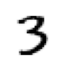

In [14]:
#fast.ai command to display a tensor in image form.We note that three_tensors and seven_tensors are 
#list of tensors,so we index one image
show_image(three_tensors[1]);

In [15]:
#Shape of the tensor
three_tensors[1].shape

torch.Size([28, 28])

In [16]:
#object type for three_tensors.
type(three_tensors)

list

Now for every pixel position in the image,we will calculate average of the pixel value over all images
.For this the images are converted into a 3 dimensional tensor.The individual tensors of the images we
have are 2D tensors(as they contain rows and columns).Now since we stack them together in a single 
tensor,this forms another dimension.Pytorch provides a "stack" function.

In pytorch for some mathematical operations such as mean,the numbers should be float instead of 
integers.So the tensor values for images are converted into float.It can be done using.float() simply.
Now since pixel values range from 0 to 255.So,we normalize pixel values by dividing them by 255 to
 get values between 0 and 1.It also shows gradient and is an indicator of the pixel intensity.

In [18]:
#Stacking bunch of Image tensors together Covert it into a 3dcube of images
#Convert values to float and divide by 255 to get normalized pixel values between 0 and 1
#This is done for all the images in the sevens and threes list
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape
# We print the shape of the stacked tensors.The third dimension shows that it is a 3d stack of images.

torch.Size([6131, 28, 28])

Whenever we print the shape of a tensor(.shape),it tells about the length of each axis in the tensor.
Here we had 6131 total 3s images in the list each of which had 28*28 pixel values(2D).As such no 
definite order is followed that first axis is the number of images,second is pixel rows and third is
pixel columns.

In [19]:
#Rank of a tensor by length of its shape
len(stacked_threes.shape)
#Rank of a tensor is the length of a tensor's shape.Shape gives the size of each axis of a tensor.

3

In [20]:
#Rank is also known as the number of dimensions
stacked_threes.ndim

3

Now as we had mentioned before we calculate the mean of the pixel values to get a central value which
can represent a "3".Mean is calculated along axis 0.This dimension indexes over all images so we 
compute the average for all the images at each pixel position.
Fastai's "show_image" is used to show an "ideal 3"

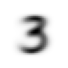

In [21]:
#Mean of the 3s images across axis-0
mean3 = stacked_threes.mean(0)
show_image(mean3);#show image represents the tensor value as image.

Same mean along 0 axis is calculated for sevens and show_image is used to show an "ideal 7"

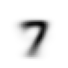

In [22]:
#Mean of the 7s images across axis-0
mean7 = stacked_sevens.mean(0)
show_image(mean7);

Now we take a random image of "3" from the stacked_image dataset and display it..

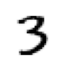

In [23]:
#Sample 3s and seeing it's close to which baseline mean model
a_3 = stacked_threes[1]
show_image(a_3);
#Its clear that it's similar to 3

Now we need to compare this image with our ideal 3 to test if its similar to 3 or not.We need some 
metric to calculate the difference between the two.We cannot just take the mean difference since they 
may cancel out each other.If anyone has worked with Machine Learning,specifically regression..
They must be aware of the metrics such as "mean absolute difference" and "mean squared difference".
These metrics are used mostly to calculate distance between continuous values.The two metrics are:

1.Mean Absolute Difference:Here mean of the absolute difference is calculated.Also called "L1 Norm".
2.Mean Squared Difference:Here mean of the squares of the differences is calculated.This is also
called "L2 Norm".Since this is of order 2,so most of the times we take square root of the value and it
is called "Root Mean Squared Error".

We calculate both the metrics for calculating the distance between the sample image and our ideal 3 value.

In [24]:
#Metrics to see the error between the test_3 and our mean basline model for 3
dist_3_abs = (a_3 - mean3).abs().mean()#Mean Absolute difference (L1 Norm)
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()#Root Mean square error(L2)
dist_3_abs,dist_3_sqr #Displaying both the errors

(tensor(0.1114), tensor(0.2021))

In [25]:
#Metrics to see the error between the test and our mean basline model for 7
dist_7_abs = (a_3 - mean7).abs().mean() #Mean Absolute difference (L1 Norm)
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt() #Root Mean square error(L2)
dist_7_abs,dist_7_sqr#Displaying both the errors 

(tensor(0.1586), tensor(0.3021))

We calculated metrics for the distance of sample image from both "ideal 3" and "ideal 7".We can 
observe that both the errors have less values in case of 3 then with 7.Since the error is less with
"3" , we can conclude that our sample image is "3" and hence our baseline model is good for this 
prediction.

Here we calculated error by providing formula for calculation.But Pytorch provides packages for Loss
functions.It provides it under "torch.nn.functional",which we can import it as F and can then use as 
below:

In [26]:
#In built pytorch functions for L1 and RMSE 
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

### NumPy Arrays and PyTorch Tensors

In the start we mentioned that Numpy arrays and Pytorch Tensors have almost same functionalities
except the fact that Pytorch supports GPU operations whereas numpy does not.This is critical for deep
learning.
We know python is a slow language.In these cases things like Numpy and Pytorch are very faster than 
pure Python and can finish complex calculations at much faster rate than Pure Python.
Let us learn about basic differences between tensors and arrays:

Numpy array is a container for n-dimensional data where all items are of same data type.Numpy provides
various operators and methods for computations and that is why is popular for scientific programming.

Pytorch tensors is same as Numpy array but it comes with additional functionalities too.It is same as
numpy arrays that is n-dimensional data container with all items of same data type.It is different in
this aspect that as we have nested arrays we do not have nested tensors.Also Pytorch objects are
capable of working on GPU so computations are faster.Pytorch also provides packages for calculating
gradients for any set of operations on Objects.

Let us learn about some basic operations on arrays and tensors:-

In [27]:
#Converting data into array and tensors
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [28]:
arr  # numpy array

array([[1, 2, 3],
       [4, 5, 6]])

In [29]:
tns  # pytorch tensors

tensor([[1, 2, 3],
        [4, 5, 6]])

In [30]:
tns[1]   #Accessing Tensor elements

tensor([4, 5, 6])

In [31]:
tns[:,1] #Tensor slice containing elements at 1st position in all rows

tensor([2, 5])

In [32]:
tns[1,1:3] #Slicing tensors 1st row and 1st and 2nd column elements

tensor([5, 6])

In [33]:
#Addition of a scalar to tensor
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [34]:
tns.type()#Type of tensor

'torch.LongTensor'

In [35]:
#Multiplying a scalar  by tensor
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

All the operations we showed on tensors have identical syntax for Numpy arrays.

## Computing Metrics Using Broadcasting

So far we have defined a baseline model for the digit classification.But how do we evaluate our model
performance.We had a validation set also in the downloaded mnist sample subset.In general to avoid 
models from getting overfit,we evaluate their performance on validation set also.Since here we are
using pixel similarity model which just calculates mean and is not getting trained on any data but 
still we can see how this model performs on validation set.

Let us repeat the same process of converting images into list of tensors and then stacking the tensors
to create a three dimensional tensor of images for the 3s and 7s images in validation set.

In [36]:
#Previous processing steps on validation set for evaluating baseline model performance
#Validation 3 images converted into tensors which are then stacked into 3d image blocks
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255 #Pixels normalized between 0 and 1
#Validation 3 images converted into tensors which are then stacked into 3d image blocks
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])#Pixels normalized between 0 and 1
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

Last we check the shape of the stacked images and it is 3 dimensional with 0 axis of 1010 and 1028 
length.These are the number of images in the Validation set.
Now we want to find for each image in these stacked tensors if they are 3 or 7.We can write a function
"is_3" which will see the error between the sample image tensor and the ideal 3 we calculated before.
Since this is a binary classification problem so we need not check for 7.Earlier we saw that error was
calculated using MAE and MSE.
Now we write a simple function which takes two tensors as input and calculates the mean absolute error
between them.

In [37]:
#A simple function which accepts two tensors(in this case test image tensor and baseline mean tensor)
# and calculates the mean absolute error along the x and y axes
def mnist_distance(a,b): 
    return (a-b).abs().mean((-1,-2)) #mean over x and y axes(last and second last distance)
mnist_distance(a_3, mean3)

tensor(0.1114)

In the above cell we passed the single test image and the mean value for the "ideal 3" we calculated 
earlier.Both of these are tensors with shape(28*28).Above we passed a single image,but when we are
doing it for validation set we need to pass every image tensor through the function.Traditional
programming says that we can loop through the stacked tensor for every image and calculate the error.
But that is a slow method.Numpy arrays use something called "Broadcasting" and even we can use the 
same.So next instead of passing only one tensor we pass the stacked three dimensional Image tensor
directly.Let us see what output we get and what is it's shape.

In [38]:
#What happens wehn we pass whole stacked 3d stacked image tensor through the absolute error function
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape#Returns list of 1010 tensors and broadcasting happens to calculate 
#the difference between the two differently shaped tensors/arrays

(tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260]),
 torch.Size([1010]))

We can see that we get a tensor with as many distance values as there were Images in "valid_3_tens".
The shape of the output tensor also verifies the same.
Now in mnist_distance function we are performing subtraction between two tensors at pixel level.But 
earlier when we passed both the tensors of same shape,it worked at pixel level.In the above cell we 
passed a tensor of different rank so it performs subtraction between tensors of different ranks using
Broadcasting.It automatically expands the tensor with the smaller rank to have the same size as the
one with larger rank and thus performs the calculation.

Let us see some of the basic operations on tensors of different ranks..

In [39]:
#Addition operation between 2 same shaped tensors.Element wise addition occurs
tensor([1,2,3]) + tensor([1,1,1]) #No broadcasting happens

tensor([2, 3, 4])

So in our case,we passed a rank-2 tensor representing a single image and the other stacked tensor had 
1010 stacked images in a 3d tensor so Pytorch extends the dimension of the rank-2 tensor and treats it
as 1010 copies of the same.And Thus has the same shape as the stacked one.

In [40]:
#subtraction between 2 differently ranked tensors as broadcasting happens 
#extra copies of the lower dimension tensor are created as many as the number of elements in higher dimension tensor
(valid_3_tens-mean3).shape#Doesn't actually copy but pretends to copy while the mathematical operation happens

torch.Size([1010, 28, 28])

Now we define function "is_3" which takes a tensor image as input and compares the distance(error)
between the passed tensor and "ideal 3" and that of "ideal 7".It will return a binary output(True or
False) on the basis which error is less.

In [41]:
#A function to predict if the passed tensor image is 3 or 7.
def is_3(x): 
    return mnist_distance(x,mean3) < mnist_distance(x,mean7)
#returns if the mean absolute error is greater with baseline model for 3 or that of 7 by calculating the error using mnist_distance function

In [42]:
is_3(a_3), is_3(a_3).float()#Passing a3 test through is_3 and it turns out it's True

(tensor(True), tensor(1.))

Next instead of single tensor of rank-2 we pass stacked tensor of rank-3 which returns a tensor 
containing Boolean values.Through broadcasting every image inside the stacked tensor is compared with
mean_3 and mean_7.

In [43]:
#broadcasting the valid_3_tens set of all3 tensor and validating if they are 3 or not
is_3(valid_3_tens)

tensor([ True,  True,  True,  ..., False,  True,  True])

Now we calculate accuracy for training and validation sets by taking average of the function for all 
3s and since it is binary problem accuracy of 7s is inverse of 3s.

In [44]:
#Accuracy for the predictions by baseline model on validation sets for 3s and 7s
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

Amazing we have a 90% accuracy on both 3s and 7s using a baseline model.But here we are classifying 
only 2 digits.So we need a better model.
To get a better model,we can remember the basic logic of deep learning we learnt in first chapter,the 
model improves its performance itself by updating the parameters and optimizes the same.Let us
learn about the training process and SGD,the most common optimizer used.

## Stochastic Gradient Descent (SGD)

In [ ]:
We had discussed in the first Chapter about the "Machine Learning" definition provided by Arthur 
Samuel.He had described it as a means of testing the model performane by assigning correct weights
and then update the weights accordingly to maximise the model performance.In a way he provided the
definition of "Deep learning".In this way model becomes better but in the earlier pixel similarity 
model,there is no weight assignment,no training of the model,no learning from data.We just used a 
central tendency approach and compare our test samples with that.So we cannot improve "Pixel Similari
ty Model".

How do we improve any Machine Learning model using weight assignment?.What are the steps involved and
how weights are updated acc to model performance?.Previously we saw that Images are made up of pixels
whose values are fed into a model while dealing with them.Weights are assigned to individual pixels 
and highest weights are assigned to those which are black.These weights determine the probability of
the digit in the Image.They would be different for different digits.The probability can be defined as
a function of Image vector(x) and the set of weights(w).
pr_eight(x,w)=(x*w).sum()
Our aim is to find a set of weights(w) which maximises the value of this function.So the steps to find
the best set of weights can be summarized as :-
1.Randomly Initialize set of weights.
2.Using them predict for each Image if it is 3 or 7.
3.Calculate loss on the basis of predictions.Use appropriate Loss function.
4.Now calculate gradient which will show how the weights should change.
5.Update the weights according to gradient.
6.Again make predictions and repeat the process
7.Continue doing the same till you find that your model is making correct predictions.

We should note this that these steps are in general True for every Deep Learning model and that every 
model uses these steps to solve any complex problem ultimately.

We would apply the general steps for training Deep learning model we discussed above to train our
Digit Classifier from scratch.But before that we can understand the basic functionalities or packages
we would use while implementing these.

In [45]:
#Minimizing loss function using stochastic Gradient descent
def f(x):
    return(x**2)

Above we defined a quatratic function which can act like our loss function.X can be assumed as our
weight parameter.

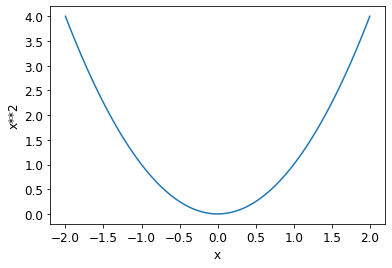

In [46]:
#plotting function using fast.ai plotting function
plot_function(f, 'x', 'x**2')

As we mentioned earlier first step would be randomly initializing our weights and making predictions 
and calculating loss.In the cell below the red point denotes our starting value of the loss.According-
ly we will calculate gradient and update weights so that we reach the set if weights where loss 
function is minimum.In this case it is at the global minima of function at x=0.

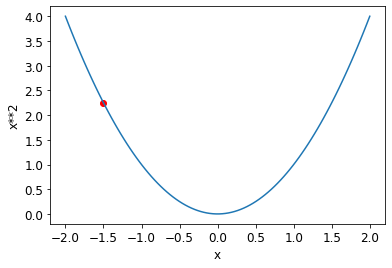

In [47]:
#Starting point for gradient descent(Randomly chosen x value)
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

So from the shape of the curve we can say that as we update the weights,the red point would keep 
sliding on the curve till it reaches x=0(global mimima).
How do we update the parameters or weights?>We change the parameters by a small value in the direction
of the slope of the curve.We repeat this a process many times until we reach the minimum of the 
function.

This idea was given by "Issac Newton" and does not change no matter how complicated the functions 
become.It is called "Gradient Descent" and is considered basic method for optimizing any function.


### Calculating Gradients

We looked above how we optimize the loss function by updating weights.The next step involves
calculating gradient.It is also called "slope".It allows us to decide how to change our weights so 
that loss decreases.Gradient is also called "derivative" of any function if any of us remember that 
from our High School mathematics.
More specifically "Derivative" is change in the value of a function divided by the change in the 
parameter.Calculus also provided shortcuts in the form of derivatives to calculate these gradients.
Now as in our High School we would not have one function here with one parameter.Loss functions 
would have lots of parameters and with gradient we will get a gradient for every weight.So we would
obtain a set of gradients for a set of weights.But it's notsomething complex.We calculate derivative
with respect to one parameter while keeping others constant.In this way gradients for every weight are
calculated.

Pytorch provides a package which lets us calculate gradient for any function.It's very easy and fast
too.Let's see how we calculate gradients using pytorch.

In [48]:
#Applying requires_grad_() method of pytorch on xt so that everytime any operation is performed 
#it remembers it and calculates gradient
xt = tensor(3.).requires_grad_()

Let's define a tensor object x.The special method "requires_grad()" tells Pytorch about the gradient
calculation.For every object we create for which we need to calculate the gradient,we tell Pytorch 
about this using requires_grad() method.
Let us pass xt through a function.

In [49]:
#Passing xt through f
yt = f(xt)
yt
#Return squared value but also a gradient function which will be used for calculating the gradient

tensor(9., grad_fn=<PowBackward0>)

In the above cell that while printing the output Pytorch also prints that it has a gradient function 
to calculate gradient whenever needed.Now we ask Pytorch to calculate gradient using .backward() 
method.

In [50]:
#This method does backpropogation that is takes derivative
yt.backward()

"Backward" means backpropogation.It means calculating derivative for each layer in neural net.In the 
further chapters we would know how it is done when we build a neural network from scratch.There is one
called "backward" pass and something called "forward pass" in which activations are calculated and 
neurons are activated.We would do that in future.Let's see how do we view the gradient.

In [51]:
#grad method gives gradient(derivative of f at xt=3)
xt.grad

tensor(6.)

We get a tensor with a single item 6 as gradient.Our function was y=x**2 so if we calculate derivative
it should be 2*x and at x=3 it's value will be 6 which is what Pytorch calculates for us.Here we 
passed a single scalar value as a tensor.Let's see what happens when we pass a set of parameters as 
vector.

In [52]:
#Passing f through a rank 1 tensor or a vector with 3 elements
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [53]:
#modifying f function to give sum of the x
def f(x): 
    return (x**2).sum()
yt = f(xt)
yt
#A sum is added to the function so that instead of a vector we get a scalar as output.

tensor(125., grad_fn=<SumBackward0>)

Now we repeat the same process we did earlier."backward" calculates the gradient and ".grad" 
calculates the gradient.

In [54]:
#Backpropogation and calculating gradient from grad function.
yt.backward()
xt.grad
#It gives a vector with the derivative for each element in the tensor

tensor([ 6.,  8., 20.])

We calculated gradients for our input xt=[3,4,10].We can see that the gradients are 2*xt the same
values we expected.So we have learnt how to calculate gradients for a set of paramaters.But it doesn't
tell us how we would change our parameters.Gradient only tells us that if it's very large,we need to
update our weights by more amount or more no of times and if gradient is small,we need to make small
updations as we may be near our global minima of the function.

Let's learn how do we step up the parameters using gradient..

### Stepping With a Learning Rate

Learning rate defines stepping the parametrs according to the gradients obtained.Gradients are 
multiplied by a number called "Learning rate" which is small in value(<1.).Learning rates are found by
trial and error by trying a few and then deciding which fits our model best.Weights are adjusted 
according to the following equation:
    w-=lr*gradient(w)
Technically this step is called "stepping the gradients".Optimization rate depends on the learning 
rate.If "lr" is very small,then we need to update weights many times and it will take time to reach 
the minima with small steps but if we have very high learning rate it can update very fast and 
sometimes it may pass our minima point and become very high.This will result in model becoming worse.

### An End-to-End SGD Example

We saw how we update our parameters to reach the minima of the loss function.But we did not see  a 
complete example till now where we optimize a function for a set of parameters and reach its minima.
Let us see a complete example now:
We take a simple example of measuring speed of a roller coaster as it climbs up the hill.Initially 
it would be fast but it would get slow as it reaches up.The speed would be minimum at the peak and 
would increase again as it starts moving down.We build a model which measures speed with time.If the 
speed changes every 20 secs,we can define time as follows:-

In [55]:
#Creating a tensor with 20 values representing time variable at which speed can be measured
time = torch.arange(0,20).float(); 
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

We define a quadratic function for speed using random values.We plot it against time.

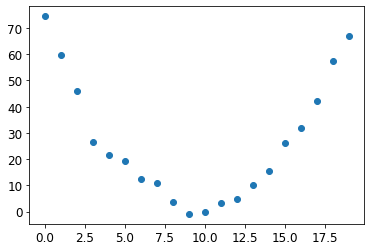

In [56]:
#defining the speed function
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);
#Plot speed against time and plot results in a convex function

Since here we don't know how the actual function for speed look like we define a quadratic function 
of the form (a*time**2 + b*t +c) with parameters a,b and c.Now our input variable is time(t) and our
function parameters(a,b and c).Using both we can calculate the speed of the roller coaster.Let's 
define a function which takes time(t) and parameters a,b,c as input and returns the speed value.

In [57]:
#function which returns the value of the function with the passed parameters at a passed value of time
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

Now our main aim is to find best set of values for a,b and c.Quadratic function is considered to be 
the simplest one and thus optimizing it will help us in finding parametrs for more complex functions 
in neural nets.
For best set of parameters we define a loss function which returns difference between the predictions
and target speed.It returns difference so we try to minimize the loss function to find best a,b and c.

In [58]:
#defining the loss function returning the mean squared error between the 
#passed target and predicted values
def mse(preds, targets): 
    return ((preds-targets)**2).mean()

Now we have discussed the main mechanism behind the process like calulating gradients,updating the 
weights and optimizing the loss function.Let's follow each and every step from the starting now..

#### Step 1: Initialize the parameters

As mentioned before first we initialize our parameters to random values.Since we have a,b and c ,3 
parameters so we initialize a vector of 3 random items with requires_grad() method provided by Pytorch
since we will calculate gradients further in process.

In [59]:
#Starting with SGD
#Step-1 Initializing random gradients with required_grad_() to calculate the gradient
params = torch.randn(3).requires_grad_()

In [60]:
#hide
orig_params = params.clone()

#### Step 2: Calculate the predictions

In the next step we calculate our predictions by passing the randomly initialized parameters in the 
earlier step.We pass the parametrs and time vector through the prediction function declared earlier.
It returns the speed value.

In [61]:
#Step-2 calculate the speed prediction using the function f defined above
preds = f(time, params)

Next since we have made our predictions we define a function to see how close or how far are our 
predictions and targets are from each other.

In [62]:
#A function which takes predictions as input and plots predictions and target together
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

Let's call the function to plot target and predictions together and see how accurate are our 
predictions.

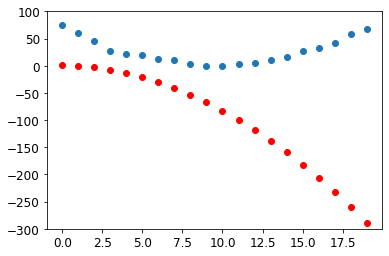

In [63]:
#Calling the show_preds function to plot target and predicted speeds together
show_preds(preds)
#It can be observed that using random values the predictions are pretty bad

The predictions and targets are not at all close and even shows having a negative speed.

#### Step 3: Calculate the loss

Next we calculate the loss using the loss function declared earlier.We pass the predictions and the 
target speed.

In [64]:
#Calculate the loss by passing the predictions and target through the mse function
loss = mse(preds, speed)
loss
#Very high loss is obtained

tensor(25823.8086, grad_fn=<MeanBackward0>)

#### Step 4: Calculate the gradients

We calculate gradients using .backward() and then view it using .grad method

In [65]:
#Now we calculate the gradient by using backpropogation and then grad method
loss.backward()
params.grad#Gradient with respect to parameters is calculated

tensor([-53195.8594,  -3419.7146,   -253.8908])

Choose a lower learning rate and multiply the gradient by learning rate

In [66]:
#multiply the gradient by learning rate
params.grad * 1e-5

tensor([-0.5320, -0.0342, -0.0025])

In [67]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

#### Step 5: Step the weights. 

Next we step our parameters using the gradient calculated and the learning rate.
Now in the equation .data is used with params because Pytorch actually remembers every operation so as
to calculate gradient on it later on.Here in this step we do not want Pytorch to calculate gradient 
for stepping our gradients and therefore we use.data method to update the parameters.


In [68]:
#Updating the weights(parameters) using the learning rate and gradient
lr = 1e-5
params.data -= lr * params.grad.data #.data is used when we don't want the gradient to be calculated
params.grad = None

Let us repeat the earlier steps again that is get predictions,get the loss function and see
how close the predictions are.

In [69]:
#Finding new predictions using the updated parameters and calculating the loss using the new predictions and target
preds = f(time,params)
mse(preds, speed)
# It can be observed that loss decreases drastically thus showing that weights are updated in correct direction

tensor(5435.5366, grad_fn=<MeanBackward0>)

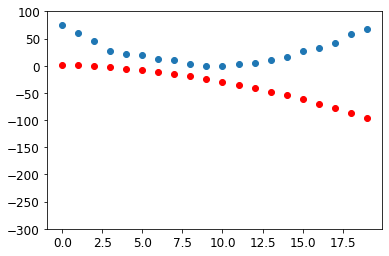

In [70]:
#plotting the new predictions with the target speed
show_preds(preds)

This process has to be repeated many times so lets create a function to step our parameters(update
the weights)

In [71]:
#defining a function for making predictions using passed parameters,calculating loss function value
#the gradient, then updating the weights according to the value of the loss function
def apply_step(params, prn=True):
    preds = f(time, params)#get predictions
    loss = mse(preds, speed)#calculate loss
    loss.backward()#calculate gradients
    params.data -= lr * params.grad.data#update the parameters
    params.grad = None
    if prn: 
        print(loss.item()) #print loss
    return preds#return predictions

#### Step 6: Repeat the process 

Now using loop we iterate over this process and repeat this several times to reach minimum of our 
loss function.

In [72]:
#repeating the process continuously by calling the apply_step function and 
#calculating the loss function value after each iteration
for i in range(10): apply_step(params)

5435.53662109375
1577.4495849609375
847.3780517578125
709.22265625
683.0757446289062
678.12451171875
677.1839599609375
677.0025024414062
676.96435546875
676.9537353515625


In [73]:
#hide
params = orig_params.detach().requires_grad_()

The loss is definitely decreasing on each iteration.But after certain iterations ,it decreases at very
small rate.Let us see this visually by plotting predictions and target together.

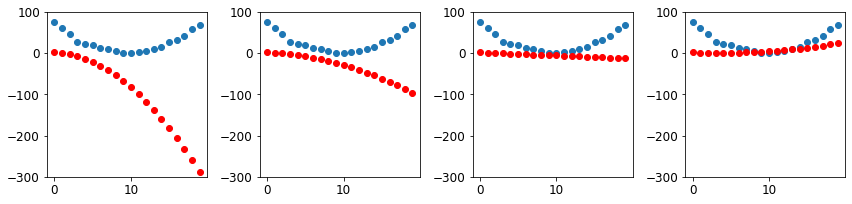

In [74]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: 
    show_preds(apply_step(params, False), ax)
plt.tight_layout()

#### Step 7: stop

Here we stopped after 10 iterations,but in practice training and validation loss is observed and 
other metrics such as entropy loss,accuracy or error_rate to see where to stop the model training.

### Summarizing Gradient Descent

In the beginning we initialized our weights to be random or they come from pretrained model.(from 
transfer learning).Then in the next step we make our predictions using these weights.Now its very rare
that in the starting only we get our predictions near to our target variable.That is why we use 
Gradient Descent to update our weights to train our model.
After obtaining predictions we compare them with our targets(actual labels) using loss function.In 
case of continuous values it is mostly mean squared error but there are other loss functions too.It 
outputs a number which we are trying to minimize by updating our weights.It is the same number which 
we had plotted earlier.Now to minimize the value given by loss function,we make little adjustments to
our weights.
We update the weights using learning rate and by calculating the gradients.Pytorch provides special
Autograd package for calculating gradients fastly.We update our weights according to the magnitude of 
the gradient.Weights are updated by multiplying gradients with learning rate which decides the step 
size.We keep repeating the process until we reach minima of our loss function and then we stop at that
point.The set of weights used in the last iterations are considered to be the optimized ones.
This process is termed as Gradient Descent as we descend towards the minima of our loss function using
gradients.

## The MNIST Loss Function

Now as we understood the whole process of Gradient Descent for optimizing our loss function,we can 
apply this on the MNISt dataset too.All the steps can be applied directly to MNIST except for the 
loss function.Let's define an appropriate loss function for MNIST data.

Our independent variables(x) are our images.We need to combine them into a single tensor and also
change the dimension of the tensor to rank-2 tensor.Dimension is changed using view method in Pytorch.
We pass the shape in the view method.-1 is a special parameter passed through view which fits the 
axis length such that all data fits in.

In [75]:
#Concatenating 3s and 7s into one matrix and changing the rank of the tensors from 3 to 2 using Pytorch's view method
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28) #view(-1,28*28) 28*28 columns and no of rows same as original data

Defining the target variable for our training data.Since we are only considering 3s and 7s in our data
so we use 1 as label for "3" and 0 for "7".

In [76]:
#Labelling the image with 1 for Three images and 0 for 7 images unsequeeze will add one dimension
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

Dataset is an object in Pytorch which is used to store data.It returns a tuple (x,y) containing 
indpendent(x) and dependent(y) variable."zip" function combines x_train and y_train into tuple and 
combined with list it gives the list of tuples having x,y.

In [77]:
#converting train_x and train_y into a dataset using zip which return a tuple
dset = list(zip(train_x,train_y))
x,y = dset[0] # returns a tuple with dependent and independent variable
x.shape,y #y-label,x-image

(torch.Size([784]), tensor([1]))

We repeat the same procedure for validation set

In [78]:
#Repeating the same process for validation data
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

Next we define a function for randomly initializing weights for each pixel in dataset.We pass size 
through the init_params function which returns a tensor of  passed size containing randomly
initialized weights along with the .requires_grad().We are required to calculate gradients in future 
so we use requires_grad() method.

In [79]:
#Initialize parameters
def init_params(size, std=1.0): 
    return (torch.randn(size)*std).requires_grad_()#tell pytorch to get gradients.required_grad_()

Earlier we saw that the probability function for an image is given by "weight*pixels".But that is not
enough because when pixels are zero,then the product will also be zero.And therefore a "bias" term is
added which is also initialized randomly

In [82]:
weights = init_params((28*28,1))#storing returned weights

Now in the beginning of this chapter we saw that the probability function for an image is given by 
"weight*pixels".But that is not enough because when pixels are zero,then the product will also be zero
.And therefore a "bias" term is added which is also initialized randomly using init_params.

In [83]:
#Initialize bias term(b) for the equation wx+b
bias = init_params(1)

Thus we introduced a bias term(b) also into the neural network.The equation thus becomes y=wx+b.
Weights(w) and bias(b) together are called parameters.

In [84]:
#getting prediction for one image
#defining the equation(wx+b) Weights*input +Bias
(train_x[0]*weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

A for loop can be used to iterate over every image to calculate each prediction but it will take a 
lot of time.Also python loops don't run on GPU.As such also Python is considered slow language.
In this case we can use matrix multiplication calculating w*x for every image in the row of matrix.
Matrix multiplication can be represented by @ operator in Python.

We define a function linear below through which we pass our X_train.It calculates wx+b for every image
in the data and gets the predictions.

In [85]:
#returning the predictions for the training set by matrix multiplication with weights and then bias added.
def linear1(xb): 
    return xb@weights + bias #@ for matrix multiplication
preds = linear1(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

We can observe from the first value in the predictions.It is the same as the one we previously 
calculated for first image separately."Wx+b" or "Weights*Input+bias" is considered one of the 
fundamental equations of any neural network.

To check accuracy of the predictions we just check if they are greater than zero.Since 3s had label 1 
and 7 had 0 so images which are 3 will have pred>0.

In [88]:
#Labelling our predictions with 0(not3) and 1(is3)
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

We calculate the fraction of images which are predicted as 3 by taking mean of the "True" predictions.

In [89]:
#calculating fraction for predictions by taking the mean of 1s obtained
corrects.float().mean().item()#.item( returs 0 ranked tensor)

0.4912068545818329

Let's change weights a little to see the effect on accuracy:

In [90]:
#Updating weights a little
weights[0] *= 1.0001

Next get the predictions for these set of weights and calculate the accuracy.

In [91]:
#Predictions and the changes in accuracy
preds = linear1(train_x) #get predictions
((preds>0.0).float() == train_y).float().mean().item() #calculating accuracy

0.4912068545818329

We saw that small changes in weights do not effect accuracy that much.

We saw previously in the steps for SGD that after getting predictions for our initialized set of 
weights,we need to update our weights to improve our model.For updating weights,we need gradients
which are calculated using loss function which we try to minimize.
We need appropriate loss function for this purpose.One option can be to use accuracy which is a metric
but can be used as loss function as well.We would calculate predictions for each image,calculate 
overall accuracy and calculate gradient for each weight with respect to overall accuracy.
But there is a problem with using accuracy as the loss function.We know that the gradient or slope is
defined as the change in the dependent variable divided by the change in the parameters.
slope=(y_new-y_old)/(x_new-x_old).We saw before that accuracy is not affected much by a small change 
in weights.So slope would be almost zero and thus accuracy if used as a loss function would have zero
gradient.
If gradients are zero,we won't be able to update the weights and thus model would not learn from the 
data.

Some other loss functions should be used instead of accuracy which will give better predictions and 
better loss.Let's define a function which takes in arguments the predictions of the model whose
 value is between 0 and 1.The other argument this function takes is the targets which also lie between
0 and 1.These predictions and targets are vectors(rank-1 tensors) and are indexed over images.Let's consider two such vectors containing the targets and the predictions for 3 random images.In these 
first is a 3,next a 7 and the other a 3.And now our predictions are such that the first image is 
predicted as 3 with high confidence(0.9),with less probability that the second image is 7 and an 
incorrect prediction that the last image is 7.

In [92]:
#alternate loss function for mnist dataset as accuracy cannot be used as 
trgts  = tensor([1,0,1]) #target labels
prds   = tensor([0.9, 0.4, 0.2]) #predicted probability

Let us define a loss function which measures the difference between the predictions and the targets.

In [93]:
#function for loss function call entropy function
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

Here torch.where(a,b,c) is used.We have never used this function before but it's same as ternary 
operator in C.It states that b is the output if a is true else c is the output.In this case we can
define it such that what would be the distance from 1 if the prediction is 1 and what would be the dis
from 0 if its zero and then we would do average of all the distances or errors.

In [94]:
#loss calculated for the predictions
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

We can observe from the loss function above that it returns a lower loss when predictions are correct
and higher when the predictions are incorrect.Lower loss is always better and since loss value should
be scalar therefore we take mean of the returned tensor.

In [95]:
#mean of the losses
mnist_loss(prds,trgts)

tensor(0.4333)

In [96]:
#Small loss with better predictions
mnist_loss(tensor([0.9, 0.4, 0.8]),trgts) #Works only when the predictions are between 0 and 1

tensor(0.2333)

Since here scores are getting subtracted from 1,so this function would work well only when the 
predictions are between 0 and 1.While making predictions we are using equation wx+b which can return
values in any range.So how do we ensure that the values are between 0 and 1.Let's look at a function 
for that 

### Sigmoid

A sigmoid function always returns values between 0 and 1.Mathematically it is (1/1+e^-x).

In [97]:
# a sigmoid function which ranges the numbers between 0 and 1 passing any number through the function
def sigmoid(x): 
    return 1/(1+torch.exp(-x))

Let's see how this function looks like when plotted.

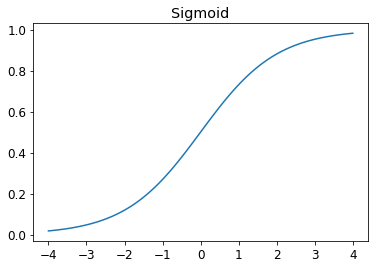

In [98]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4) #plotting sigmoid function using fastai's
#plot_function

From the input values it is very clear that whatever the input is the output always lies between 0 and
1.Also since its a smooth curve it is easy to find gradients.

Let us modify mnist_loss such that sigmoid is applied to our predictions so they lie between 0 and 1.

In [99]:
#mapping predictions through the sigmoid function so that it maps values between 0 and 1
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()
#accuracy cannot be used to get gradients

Now this loss function would work with every prediction since sigmoid will map them between 0 and 1.
We earlier discussed that why can't we use accuracy which is a metric as loss function.Let's dig into
it more..
Though it may sound that loss and metric both indicate same thing and can be used in each others place
but that's not true.Metrics is something we just see to drive human understanding,just to make a 
judgement if the current model or current step in a model is going fine or not whereas loss is 
necessary to improve our model.We need loss to calculate gradients without which we can't update our 
weights and thus model won't be improved.Loss is calculated for every item in our dataset and then at 
the end of each epoch loss is averaged and mean value is printed.
Metrics is something very important and tell us about the performance of our model.While evaluating
model performance,we should concentrate on metrics value rather than loss.

### SGD and Mini-Batches

We learnt about loss function and how it is used in the training phase to update the weights on the 
basis of gradients.We saw previously that loss is calculated for every item in the dataset and then
all the values are averaged.But while learning process,if it is calculated separately for each item,
training time would increase and if we use loss of just one item or a few more,it cannot represent the
loss of whole dataset.Therefore a batch system is considered in which loss is calculated for few items
at a time and it is called a mini-batch.No of items in a single batch is called batch size.It can be 
set manually and would remain same for every batch in that model.Batches containing more items would 
take longer time to learn but would be more accurate at the time of model building.
Selecting a good batch size is also a crucial step while building model as it helps in getting a more
accurate as well as fast model.Choosing a large batch size sometimes leads to memory running out.
Setting mini batches is also a good method to get our model more generalized in case we test them on
some outside data.
Before putting model into Training we split the whole dataset into minibatches with random shuffling 
too.Pytorch amnd Fastai provides a DataLoader object which splits dataset automatically into
mini batches of given batch_size.

let's create a DataLoader object for a simple numerical data

In [100]:
#Doing a step for each image would be slow so we take multiple images together and update the weights
#so batches of data are used to update the weights
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)#class from 
list(dl)

[tensor([11,  9, 12, 14,  7]),
 tensor([ 8,  5, 10,  3,  2]),
 tensor([ 1,  6, 13,  0,  4])]

As we had discussed before about DataSet which is List of tuples containing dependent and independent
variables.Let's create a DataSet and pass this to a DataLoader object..

In [101]:
#tuples of lowercase letters
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [102]:
#Dividing into batches using DataLoader
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([ 2, 13, 14,  6, 12,  8]), ('c', 'n', 'o', 'g', 'm', 'i')),
 (tensor([15, 16,  4, 19,  3, 21]), ('p', 'q', 'e', 't', 'd', 'v')),
 (tensor([ 7, 18, 17, 24, 10,  1]), ('h', 's', 'r', 'y', 'k', 'b')),
 (tensor([ 5, 20, 23, 25,  0, 22]), ('f', 'u', 'x', 'z', 'a', 'w')),
 (tensor([11,  9]), ('l', 'j'))]

We created a Dataset ds containing tuples of lower case letters and their index.Next we passed it 
through a DataLoader to create batches of batch size 6.

## Putting It All Together

Let's use the DataLoader we created to use it for training our model.We would be using the same 7 
steps we had discussed earlier for SGD..

Step-1:Initialize the parameters(weights,bias) using the "init_params" function.

In [103]:
#Initializing the weights and bias for 3 and 7 dataset
weights = init_params((28*28,1))
bias = init_params(1)

Step-2 Pass the dataset through DataLoader object to split it into batches of size 256.

In [104]:
#loading dset into DataLoader for splitting into batches
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl) #fast.ai function which grabs first index through a iterator
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

Next load validation set into different dataloader with same batch size.

In [105]:
#Loading validation data into the DataLoaders
valid_dl = DataLoader(valid_dset, batch_size=256)

Just to see if our functions are working properly we slice 4 images from our training set

In [106]:
#Grabbing first 4 images from training set
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

We pass them through the linear1 function to get the predictions(wx+b)

In [107]:
#Predictions for 4 images in batch by passing it throught the linear function(wx+b)
preds = linear1(batch)
preds

tensor([[-2.1876],
        [-8.3973],
        [ 2.5000],
        [-4.9473]], grad_fn=<AddBackward0>)

Next after getting predictions we pass preds and targets through the mnist_loss function to get the 
loss calculated(cross entropy loss)

In [108]:
#Calculating cross entropy loss for the predictions
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.7419, grad_fn=<MeanBackward0>)

Next as per the regular procedure we calculate gradient using.backward() and take the mean of all the 
items in gradient.

In [109]:
#Backpropogating the loss function 
loss.backward()#every pixel has a gradient
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0061), tensor([-0.0420]))

Now we put all this together in a function so that we can pass the wholw batches together along with
the model.

In [110]:
#function for calculating gradient from the loss  
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

Now we test it by passing the first four images in our training data..

In [111]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0121), tensor([-0.0840]))

In [112]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad
#Calculating gradients twice it changes because .grad adds the gradients it calculates

(tensor(-0.0182), tensor([-0.1260]))

When we call the function twice the value of the gradient changes.That is because loss.backward adds 
the gradients to the other gradients already stored.So the gradient should be set to zero first..

In [113]:
weights.grad.zero_() #A tensor of weights containing zeros
bias.grad.zero_();#A bias containing zeros

Methods in Pytorch whose names end with a "_" are used for changing objects in place.It sets all the
gradients to zero.

Now as we have calculated gradients we need to update the weights and bias using learning rate.So we
define a function to step the weights.This function also includes the calculating gardient step.So we 
define an overall function through which we pass model,learning rate and parameters.

In [114]:
def train_epoch(model, lr, params):
    for xb,yb in dl:#looping through each batch in dataloader
        calc_grad(xb, yb, model)#calculate gradients for each batch
        for p in params:#loop through params(weights,bias)
            p.data -= p.grad*lr # doesn't update the gradients data attribute is used so that it 
#doesn't calculate the gradient for this step
            p.grad.zero_()#zero the gradient

To see how model is performing we will have to check the accuracy of the model.Since the model is 
classifying digits as 3 or 7,so accuracy can be just checked by checking if its greater than 0.5.
Threshold is 0.5 due to the sigmoid function.

In [115]:
#To measure accuracy threshold changes to 0.5 due to Sigmoid function
(preds>0.5).float() == train_y[:4]

tensor([[False],
        [False],
        [ True],
        [False]])

Let's define a function to calculate batch accuracy..

In [116]:
#function for calculating accuracy of the batches
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()# passing predictions through sigmoid
    correct = (preds>0.5) == yb #get correct predictions
    return correct.float().mean() #returns mean of the correct predictions.

In [117]:
#Get accuracyfor every batch
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.2500)

We can then put all the batches together now to train a complete epoch

In [118]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl] #Passing every batch in validation 
    #set through the model and calculate batch_accuracy using the predictions
    return round(torch.stack(accs).mean().item(), 4) #stacking the accuracies and calculating the mean

Let's test the function by passing the model "linear1" through the function.It returns the validation
accuracy.

In [119]:
validate_epoch(linear1) #validation set accuracy

0.5263

In the first chapter we saw while building initial models that they are run for several epochs.Let's 
see if training the model for next epoch improves our accuracy.

In [120]:
#Training the model for another epoch 
lr = 1.#Learning rate
params = weights,bias#weights and bias
train_epoch(linear1, lr, params) #training the epoch
validate_epoch(linear1)#validating the epoch with validation set
#accuracy changes

0.6664

We observed that accuracy improves by more than 10% on running another epoch.So we further run a few
more epochs to improve the accuracy.

In [121]:
#training and validating epochs for around 20 epochs
for i in range(20):
    train_epoch(linear1, lr, params)#train each epoch by passing model,learning rate,parameters
    print(validate_epoch(linear1), end=' ')
    #We can observe that the accuracy increases and becomes 96% after several epochs

0.8266 0.89 0.9184 0.9277 0.9399 0.9467 0.9506 0.9526 0.956 0.9579 0.9599 0.9609 0.9614 0.9619 0.9633 0.9638 0.9648 0.9658 0.9672 0.9677 

We attained an accuracy of about 97% which is similar to the "pixel similarity approach".Next 
an object can be created which would help in handling the SGD steps.Pytorch provides a special
package called Optimizer for the same.But here we will be defining an optimizer from scratch.

### Creating an Optimizer

Pytorch provides special packages for very often used models or functions.Previously we had defined a 
linear function for getting the predictions using equation wx+b where w=weights and b=bias.Weights
and bias are called parameters.Using pytorch we can instead create nn.Linear module.Module is object
inherited from Pytorch's nn.Module class.These objects have functionality similar to Python functions.
On passing the shape of the parameters through the nn.Linear class it will return the activations
of the model.It initializes the parameters on its own and we don't have to define separate function
for the same.

In [122]:
#Define a model
linear_model = nn.Linear(28*28,1)
# A pytorch class which initialized the weights and biases and also calculates the predictions 

In [123]:
#Gives weights(w) and bias(b) as the parameters
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

We can get the parameters(weight and bias)using the parameters method of the nn.Linear object.Next
we can use this to create an Optimizer..

In [124]:
#Create optimizer class which does the same steps for updating the parameters
class BasicOptim:
    def __init__(self,params,lr): 
        self.params,self.lr = list(params),lr # get parameters and the learning rate

    def step(self, *args, **kwargs):
        for p in self.params:#iterate through the weights and bias in the parameters 
            p.data -= p.grad.data * self.lr #step the gradients

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None #make the previous gradient zero to avoid updation

We defined a class for Optimizer which takes the parameter and learning rate and it updates the
parameters.(both weights and bias)

In [125]:
#passing parametrs and learning rate for creating an optimizer
opt = BasicOptim(linear_model.parameters(), lr) #creating an object for Optimizer class

We create an object of BasicOptim class and pass the model parameters and learning rate.Next we can 
define a function to train an epoch now..

In [126]:
#Training an epoch
def train_epoch(model):
    for xb,yb in dl: #for every batch in dataloaders
        calc_grad(xb, yb, model)#calculate gradient for the batch using the loss and predictions
        opt.step()#Update the gradients
        opt.zero_grad()#Make the previously stored gradients zero later(to avoid addition of graients)

The validation function remains the same.

In [127]:
#validating the epoch remains same
validate_epoch(linear_model)
#retrns the average accuracy

0.461

Previously we had defined train_epoch function which trains data for an epoch.One epoch means training
all mini batches of data for one cycle.To improve the model accuracy , we train our model over several
epochs so next we define a train_model function which takes model object and no of epochs as 
arguments and prints the accuracy for each epoch.

In [128]:
#Putting both in a function to train and iterate over the epochs
def train_model(model, epochs):
    for i in range(epochs):#iterating through each epoch
        train_epoch(model) # training epochs
        print(validate_epoch(model), end=' ')#printing the validation accuracy

In [129]:
#Training our model for 20 epochs
train_model(linear_model, 20)

0.4932 0.7686 0.8555 0.9136 0.9346 0.9482 0.957 0.9634 0.9658 0.9678 0.9697 0.9717 0.9736 0.9746 0.9761 0.977 0.9775 0.9775 0.978 0.9785 

We pass the linear_model and number of epochs as 20 through the train_model function.

Previously we had defined a Basic_Optim class for the optimizer.But Pytorch lets us do that in one
line of code.It provides a SGD class which works like the Basic_Optim class only.

Next we combine all our steps and use Pytorch classes to create our model.

In [130]:
#Pytorch has a SGD class for creating an optimizer by passing the model parameters and learning rate
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)#training the model for 20 epochs

0.4932 0.8179 0.8496 0.9141 0.9346 0.9482 0.957 0.9619 0.9658 0.9673 0.9692 0.9712 0.9741 0.9751 0.9761 0.9775 0.9775 0.978 0.9785 0.979 

In the above cell we used train_model function to calculate and print the accuracy for each epoch.We
also use a for loop to iterate over each epoch.But fastai provides Learner.fit method which can be 
used in place of train_model and it allows us to pass the number of epochs and prints the accuracy.
In the previous lessons also we had created cnn_learner and unet for Image classifier and image 
segmentation repsectively.We need to pass data in the form of dataloaders for the same.So we create
dataloaders for our data by passing dl and valid_dl.

In [131]:
#Fast.ai and pytorch also provide a method to create learner without using train_model by passing all the parameters required
dls = DataLoaders(dl, valid_dl)#Creating data loader which dividesd data into batches

Here we would be creating a simple learner without any application such as "cnn_learner" or 
"unet_learner".Also while creating Learner we pass all the elements we talked about in this Chapter
such as the linear model,the optimizer,the loss function and the metrics along with the most important
data loaders.So let's define our Learner.

In [132]:
#Creating the learner by passing the dataloader,the nn.Linear which initializes weights and bias and 
#calculates the predictions,the optimizer function such as SGD,the loss function used and metrics used
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,                                    #(Accuracy or squared loss)
                loss_func=mnist_loss, metrics=batch_accuracy)

Now we call the fit method by passing the no of epochs and the learning rate(lr).This will train our
epochs and also print the training and validation loss along with the accuracy.

In [134]:
#Pytorch also provides a fit method which can fit the learner with no of epochs and learning rate
learn.fit(10, lr=lr)#It does it very fast and saves the time
#This is a linear function but we ca

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636709,0.503144,0.495584,00:00
1,0.429828,0.248517,0.777233,00:00
2,0.161680,0.155361,0.861629,00:00
3,0.072948,0.097722,0.917566,00:00
4,0.040128,0.073205,0.936212,00:00
5,0.027210,0.059466,0.950442,00:00
6,0.021837,0.050799,0.957802,00:00
7,0.019398,0.044980,0.964181,00:00
8,0.018122,0.040853,0.966143,00:00
9,0.017330,0.037788,0.968106,00:00


We can see that accuracy increases with each epoch which is a very good thing for any model.Previously
we had trained this same model using different functions which had long lines of code but using 
Pytorch or fastai classes let us do all these things within a few lines of code.It is no magic just 
some packages for our use.We achieved around 96.8% accuracy with the linear model.Let's add some non
linear to make it a neural network..

## Adding a Nonlinearity

We tried out building a simple linear classifier.We can add non-linearity to it to make it a network.
We add a non linear function  between two linear classifiers to give neural network.We would first 
understand the basic structure of a neural network.

In [135]:
#Turning the linear function into Non-Linear neural network
#@ stands for matrix multiplication
def simple_net(xb): 
    res = xb@w1 + b1 #Linear function
    res = res.max(tensor(0.0))#Does a max between the linear value and zero and turns negatives into 0
    #It is called rectified linear unit function 
    res = res@w2 + b2#It will again turn it into a linear function
    return res

Above definition of a neural net has two linear classifiers with a max function.We initialize the
parameters using the init_params.For understanding purpose we are using our defined functions here.
Further we would be using the Pytorch functions and classes in the Chapter.

In [136]:
#Weight and Bias tensors
w1 = init_params((28*28,30)) 
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

Here w1,w2 and b1,b2 are weights and bias tensors for the two linear classifiers.These are randomly 
initialized.W1 has 30 output activations which are then input to w2 so it has 30 input activations.The
shape of the parameters can be changed to anything here.
In the "simple_net" function the res.max(tensor(0.0)) is called "the rectified linear unit".It is also
called "ReLu".The name of this function seems complex due to the word "rectified" but in real it's a 
very simple function.It actually makes all the negative nos zero and number greater than 0 increase
linearly that's why it is called "rectified linear unit" or ReLu in short form.In pytorch we can 
access this function using F.relu.

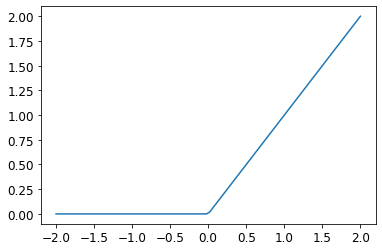

In [137]:
#Rectified Linear unit function
plot_function(F.relu)

When making neural networks more complex we mean that adding more layers to the neural net leads to
more computation and modelling complex mathematical functions.But if we keep adding multiple layers 
one after other,it results in multiplying different things and adding them up which is equivalent to
to multiplying things and then adding them just once.In terms of layers it means instead of multiple
layers we can have single layer with different sets of parameters.
Non linearity is added to make the neural net more generalized.Also it has been proven that such 
functions can actually solve any problem in the world ,we just need right set of parameters w1 and w2.
This theorem is actually called "universal approximation theorem".Below we will create a neural net 
with three layers, 2 linear(nn.Linear) and one non-linear(nn.ReLU).We should note here that we will be
using Pytorch classes to create this neural net.

In [138]:
#Setting a sequential linear layers and hidden layer for nonlinearity using Pytorch's nn.Sequential class
#it passes the results of one function to other
simple_net = nn.Sequential(
    nn.Linear(28*28,30), #Linear (output has 30 actiovations)
    nn.ReLU(),#Non Linear RElu
    nn.Linear(30,1)#Linear(input has 30 activations)
)

Next we create the learner in the same way we had created before.We also pass the dataloaders,the 
neural_net,the optimizer,the loss function and the metrics through it.

In [139]:
#Training a learner for dataloaders using simple learner 
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

Next we use Pytorch's "learn.fit" method to train our model for 40 epochs and learning rate of 0.1.We
pass these as the arguments to the method.Since this model contains multiple layers so it is a deeper 
model so we use more number of epochs and a less learning rate to train the learner.

Previously when we had introduced ReLU we had used "F.relu" to plot the function.Now when we defined
our neural net in the non linear layer we used nn.ReLU.In Pytorch some functions also have same forms 
in modules.They can be accessed by replacing F by nn.When we define neural net nn.Sequential uses 
module form of the layers therefore we use nn.ReLU and these are classes so we instantiate them by
nn.ReLU().

In [140]:
#Training ur model for 40 epochs with linear rate 0.1
learn.fit(40, lr=0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.333021,0.396112,0.512267,00:00
1,0.152461,0.235238,0.797350,00:00
2,0.083573,0.117471,0.911678,00:00
3,0.054309,0.078720,0.940628,00:00
4,0.040829,0.061228,0.956330,00:00
5,0.034006,0.051490,0.963690,00:00
6,0.030123,0.045381,0.966634,00:00
7,0.027619,0.041218,0.968106,00:00
8,0.025825,0.038200,0.969087,00:00
9,0.024441,0.035901,0.969578,00:00


So increase in the number of epochs results in increase in our accuracy of the model.Fastai also
gives us functionality to see the accuracy pattern with the training process.The values are stored in
learn.recorder and therefore we can plot accuracy with "the number of epochs".

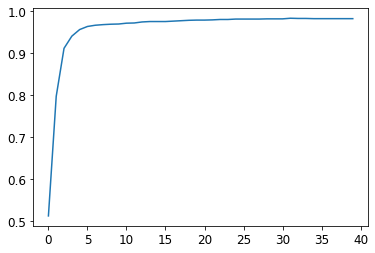

In [142]:
#L class has itemgot which takes 2nd item for every row and here we can see that it plots accuracy vs
#the no of epochs
plt.plot(L(learn.recorder.values).itemgot(2));

We can also print the final accuracy.

In [143]:
#recorder.values gives the table of metrics for each epoch
#Displaying the accuracy for final epoch
learn.recorder.values[-1][2]

0.98233562707901

We can actually save the architecture of the model using the model method.It will store the number and
the types of layers present in the net.We can also get parameters for each layer using .parameters()
method.

In [144]:
m=learn.model #gives the sequences of the layers in model
w,b=m[0].parameters() #gives the parameters of the first linear layer
w,b#Weights,bias

(Parameter containing:
 tensor([[ 0.0221,  0.0056,  0.0311,  ..., -0.0346,  0.0339, -0.0108],
         [ 0.0173,  0.0260,  0.0042,  ..., -0.0003, -0.0031,  0.0192],
         [-0.0169, -0.0154, -0.0292,  ..., -0.0234,  0.0339, -0.0021],
         ...,
         [ 0.0080, -0.0167, -0.0217,  ..., -0.0069,  0.0005,  0.0041],
         [-0.0155, -0.0012, -0.0065,  ...,  0.0157, -0.0036,  0.0091],
         [ 0.0194,  0.0271,  0.0235,  ..., -0.0133,  0.0217,  0.0088]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0010, -0.0151, -0.0222, -0.0243,  0.1202, -0.0458, -0.0117, -0.0033,  0.0362, -0.0414, -0.0424, -0.0313, -0.0168, -0.0165, -0.0413,  0.0941, -0.0371, -0.0510, -0.0029,  0.1855, -0.0610,
          0.0396,  0.1468,  0.0117,  0.1596, -0.0124, -0.0010, -0.0137,  0.0011, -0.0017], requires_grad=True))

We already learnt this before that when we pass images through different layers in neural net.Each
layer is responsible for extracting different features.We can actually display the image through 
different layers.

In the middle of this Chapter we learnt about "Universal Approximation Theorem" which says that Deep
learning can actually solve any complex problem in this world.We can solve much more complex problems
later on..

### Going Deeper

For MNIST dataset we built a neural network of 2 layers with one layer of non-linearity in between.
But as the model becomes more deep(more layers),choosing right set of weights become difficult.
A model with two linear layers with a nonlinear layer between them is enough for approximating any
complex mathematical function.But to get a better performance we would need more deeper models.More 
deeper models mean more layers but not necessarily more parameters we can have smaller matrices of 
parameters with more number of layers and we could get better performance than that of more parameters
and less layers.

If there are more layers but less parameters,it also becomes easy to train the model quickly and with
less memory.Earlier researchers mostly focused on solving problems through linear layers rather than
non-linear layer.Later some experiments showed that deep models could perform better.Let'see change
in model performance when we train it using a 18 layer pretrained model.

In [150]:
dls = ImageDataLoaders.from_folder(path,num_workers=0)
learn = cnn_learner(dls, resnet18,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

RuntimeError: Expected object of scalar type Long but got scalar type Int for argument #2 'target' in call to _thnn_nll_loss_forward

## Jargon Recap

## Questionnaire

1. How is a grayscale image represented on a computer? How about a color image?
1. How are the files and folders in the `MNIST_SAMPLE` dataset structured? Why?
1. Explain how the "pixel similarity" approach to classifying digits works.
1. What is a list comprehension? Create one now that selects odd numbers from a list and doubles them.
1. What is a "rank-3 tensor"?
1. What is the difference between tensor rank and shape? How do you get the rank from the shape?
1. What are RMSE and L1 norm?
1. How can you apply a calculation on thousands of numbers at once, many thousands of times faster than a Python loop?
1. Create a 3×3 tensor or array containing the numbers from 1 to 9. Double it. Select the bottom-right four numbers.
1. What is broadcasting?
1. Are metrics generally calculated using the training set, or the validation set? Why?
1. What is SGD?
1. Why does SGD use mini-batches?
1. What are the seven steps in SGD for machine learning?
1. How do we initialize the weights in a model?
1. What is "loss"?
1. Why can't we always use a high learning rate?
1. What is a "gradient"?
1. Do you need to know how to calculate gradients yourself?
1. Why can't we use accuracy as a loss function?
1. Draw the sigmoid function. What is special about its shape?
1. What is the difference between a loss function and a metric?
1. What is the function to calculate new weights using a learning rate?
1. What does the `DataLoader` class do?
1. Write pseudocode showing the basic steps taken in each epoch for SGD.
1. Create a function that, if passed two arguments `[1,2,3,4]` and `'abcd'`, returns `[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]`. What is special about that output data structure?
1. What does `view` do in PyTorch?
1. What are the "bias" parameters in a neural network? Why do we need them?
1. What does the `@` operator do in Python?
1. What does the `backward` method do?
1. Why do we have to zero the gradients?
1. What information do we have to pass to `Learner`?
1. Show Python or pseudocode for the basic steps of a training loop.
1. What is "ReLU"? Draw a plot of it for values from `-2` to `+2`.
1. What is an "activation function"?
1. What's the difference between `F.relu` and `nn.ReLU`?
1. The universal approximation theorem shows that any function can be approximated as closely as needed using just one nonlinearity. So why do we normally use more?

In [ ]:
Ans-1.A gray-scale image is represented as 2D matrices with rows and columns containing pixel values 
between 0 and 255.Color images contain an extra dimension for color coding and thus they can be repre
sented as 3D matrices.
Ans-2.MNIST_DATASET contain two main folders called "train" and "valid" which contain training and 
validation set respectively.Further these folders contain folders 3 and 7 containing images of 3 and
7 respectively.
Ans-3.The pixel similarity approach basically calculates the mean of the pixel values for each 
pixel across all images differently for 3 and 7.In this way we get a baseline ideal image for both 3 
and 7 containing mean pixel values which are then compared with test images and error is calculated.
On the basis of min error it is decided if it is 3 or 7.
Ans-4.List comprehension is an easy and fast way to create lists from existing lists.
Eg.odd_list=[2*l for l in list_1 if l%2!=0]
Ans-5 Rank 3 tensor is a tensor with 3 dimensions.It is made up of 3D matrices or arrays.It is also
called triad.
Ans-6 Rank of a tensor is simply the number of dimensions of tensor whereas shape gives the length of
each dimension or axis of the tensor.We can get the rank of a tensor using the number of elements in 
its shape.
Ans-7 RMSE stands for root mean squared error.It is one of the loss functions used for optimizing the
parameters.It is the square root of mean of the squared values of the difference between the targets 
and predictions.L1 Norm is the mean absolute error.It is simply the mean of the absolute difference
between the targets and the predictions.
Ans-8 It can be done using an array functionality called Broadcasting where operations are performed
between arrays or tensors of different shapes.It extends the tensor with lower rank so that it is same
as the one with the higher rank and then operations can be done on individual elements.
Ans-9 arr=tensor(range(1,9))
      arr=arr.view(3,3)
      arr=arr*2
Ans-10  Broadcasting is used for performing operations between tensors/arrays of different ranks.It
expands the rank of the tensor with lower rank.
Ans-11 Metrics are calculated mostly for validation set but so as to evaluate model's full performance
and so as to improve the model training and validation metrics both are considered.
Ans-12 SGD stands for Stochastic Gradient Descent.It is one of the methods used for optimizing the 
parameters in neural networks.It uses mini batches of data to update the weights.
Ans-13 SGD uses mini batches of data.It is because if it uses whole dataset for training,it would take
a lot of time and using a single item wouldn't produce much information.Therefore subsets of data
called mini-batches are used.
Ans-14 The seven steps of SGD are as follows:-
1.Randomly Initialize set of weights.
2.Using them predict for each Image if it is 3 or 7.
3.Calculate loss on the basis of predictions.Use appropriate Loss function.
4.Now calculate gradient which will show how the weights should change.
5.Update the weights according to gradient.
6.Again make predictions and repeat the process
7.Continue doing the same till you find that your model is making correct predictions.
Ans-15 Weights are initialized randomly by passing the shape of the input matrix or sometimes in case 
of Transfer Learning,it uses weights of the pre-trained model.
Ans-16 Loss is a measure of the difference between the target values and the predicted values.
Ans-17 A high learning rate would result in overstepping of the parameters and instead of reaching the
minima the values can shoot up and it can reach beyond minima.
Ans-18 A "gradient" is simply the change in the dependent variable divided by the change in the 
independent variable.
Ans-19 We should know the meaning of the gradient rest Pytorch provides special AutoGrad Package for 
directly calculating the gradient.
Ans-20 Accuracy is a metric for evaluating model's performanc.Accuracy changes only when there is a
change in any incorrect prediction or some change in weights.A small change in weights won't change 
accuracy much and therefor gradient would be very less nearly 0.For loss function, we need something
to have a significant gradient value so that we can update the weights value.If the gradient is 0,then
Accuracy cannot be used as a loss function.
Ans-21 Sigmoid function is special because it has a universal range of (0,1).It maps all the real 
values between 0 and 1 which is then used as activation functions sometimes and a threshold is decided
to separate between the classes in predictions.
Ans-22 A loss function is used for automating the gradient calculation.Our weights are updated on the 
basis of gradient values.Set of weights are optimized to reach minima of the loss function which is a
measure of the distance between target and predictions.
Ans-23 W-=lr*gradient(w)
Ans-24 DataLoader class divides the data into mini batches of a definite batch size so that data is 
fed into the model in batches.
Ans-26 It is called Dataset and when a list of indepenent and dependent variables are passed,it maps
both into single tuples and returns a list of tuples containing independent and dependent variable 
values.
Ans-27 .view method changes the shape of any tensor in Pytorch.
Ans-28 "Bias" is a value added to the matrix multiplication product of weights and the input image.
Sometimes when the input image is a sparse matrix then if they are multiplied by weights,the product
is zero.Therefore we won't get any gradients.Adding a bias term ensures that the prediction is always
non zero.
Ans-29 @ operator stands for Matrix Multiplication in Pytorch
Ans-30 Backward method calculates gradient for the particular matrox whenever any operation is 
Ans-31 We do "opt.grad_zero" to clear the gradients previously calculated as they keep up adding every
time each operation is performed.
Ans-32 In learner we need to pass the dataloaders,the model,the optimizer,the loss function and the 
metrics.
Ans-33 def train_model(model,epochs)
       for i in range(epochs)
       train_epoch(model)
       validate_epoch(model)
Ans-34 ReLu stands for rectified linear unit.It is also one of the activation functions and generally
used for introducing Non-Linearity to the model.
Ans-35 layers in a neural network can be linear or non-linear.To introduce non-linearity,the output 
from a layer should be mapped with a non-linear function and such functions are called non-linear 
functions.As they help in activating the neuron.
Anns-36 Pytorch provides functions both in the form of classes as well as pure functions.Pytorch's 
nn.module has nn.ReLu class and functions module has F.ReLU.Both are same activations only.It's just 
that while using in neural networks,we prefer to use them as nn.ReLU objects.
Ans-37 To improve the accuracy and performance we tend to use more non-linear layers in a neural 
network.

### Further Research

1. Create your own implementation of `Learner` from scratch, based on the training loop shown in this chapter.
1. Complete all the steps in this chapter using the full MNIST datasets (that is, for all digits, not just 3s and 7s). This is a significant project and will take you quite a bit of time to complete! You'll need to do some of your own research to figure out how to overcome some obstacles you'll meet on the way.